## Prophet stock prediction

Prophet library has been developed by Facebook as a tool for time series forecasting.

Neural network machine learning models for time series prediction - like LSTM neural nets need typically thousands of instances of time series to learn from. On the other hand, Prophet learns only from the one time series that is given to it and makes predictions only based on that. That is great benefit. For the usecase that has been tested here the learning and predicting part takes only few seconds per one time series instance.

Super cool and super simple.

Prophet works incredibly well on historical data that has reocurring pattern - some kind of seasonality. Yearly, monthly, weekly or daily seasonality.

Hence Prophet library is ideal for prediction of electricity consumption during the year or sales of already established product with long selling history.


#### But what about stocks? 
Stock price is not seasonal in general. While some sectors are cyclical, in general we cannot say that every Tuesday Google stock goes up.


Making predictions with prophet is super easy, prediction takes only one line of code, all the heavy lifting is done under the hood.

``` 
Prophet().fit(df)
```

Of course, that Prophet library does not know the future. But it learns from past dataset and past priceaction and tries to extrapolate the behaviour into the future.

Example prophet predictions - VNO and XOM stocks

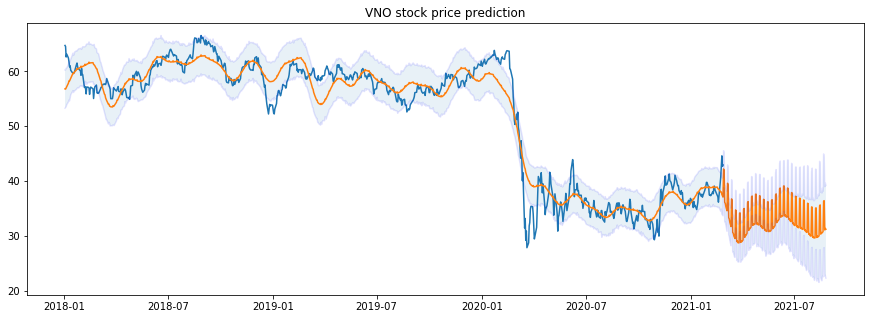


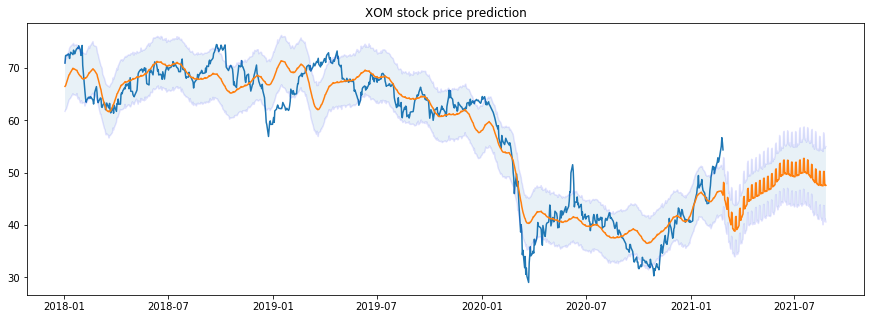

Above are examples of two stocks with rather complex behaviour (they just dont go up or just down). Looks like Prophet learned from the steep drop and in further predictions also predicts another drop after significant price runup. That intuitively seems like reasonable thing to do.

### Import libraries

In [51]:
# Optional installation with Anaconda
# conda install -c conda-forge fbprophet

In [52]:
import pandas as pd
from fbprophet import Prophet

from datetime import datetime
import yfinance as yf

In [53]:
#suppress warnings
import warnings
warnings.filterwarnings("ignore")


### Actual predictions
We will download daily data from yahoo finance and make prediction ```n``` days into the future.
Prophet requires us to use specific names for for time(```ds```) and price columns (```y```).

```
# prophet needs specific column naming
df['ds'] = df['Date']
df['y'] = df['Adj Close']
```

So we just feed the data into prophet and make predictions.

See more info on official Prophet quick start guide:
https://facebook.github.io/prophet/docs/quick_start.html

In [54]:
start=datetime(2018,1,1)
end=datetime.now().date().isoformat()    # today

# pick stock ticker
# symbol = 'BTC-USD'  # usage for crypto
symbol = 'AAPL' # usage for stocks

In [55]:
df =  yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [56]:
df.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,41.380238,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,41.373032,43.057499,43.637501,42.990002,43.132500,118071600


In [57]:
df = df.reset_index()

In [58]:
df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-02,41.380238,43.064999,43.075001,42.314999,42.540001,102223600
1,2018-01-03,41.373032,43.057499,43.637501,42.990002,43.132500,118071600


In [59]:
# prophet needs specific column naming
df['ds'] = df['Date']
df['y'] = df['Adj Close']

In [60]:
df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,ds,y
0,2018-01-02,41.380238,43.064999,43.075001,42.314999,42.540001,102223600,2018-01-02,41.380238
1,2018-01-03,41.373032,43.057499,43.637501,42.990002,43.132500,118071600,2018-01-03,41.373032


In [61]:
m = Prophet()
#m.fit(df.iloc[:-365])
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future = m.make_future_dataframe(periods=180)
future.tail(2)

,ds
974,2021-08-28
975,2021-08-29


In [63]:
forecast= m.predict(future)
forecast.tail(2)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
974,2021-08-28,172.986227,155.035460,192.657953,165.407147,204.531512,11.214497,11.214497,11.214497,0.0,0.0,0.0,-0.510364,-0.510364,-0.510364,11.724861,11.724861,11.724861,184.200723
975,2021-08-29,173.176393,155.039521,193.107103,166.144027,203.887040,11.196193,11.196193,11.196193,0.0,0.0,0.0,-0.510364,-0.510364,-0.510364,11.706558,11.706558,11.706558,184.372586


### Built-in Prophet plot

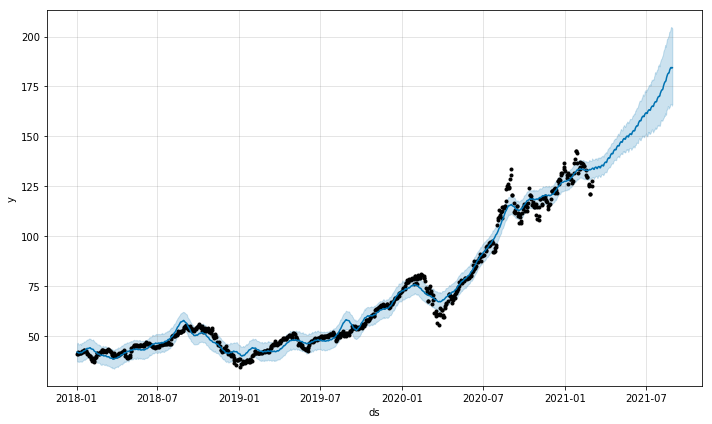

In [64]:
fig1=m.plot(forecast)

### Custom plot with matplotlib
Since we have the dataframe generated by Prophet, it is very easy to plot it with our favourite python plotting library. In this case we are utilizing matplotlib.

In [65]:
import matplotlib.pyplot as plt

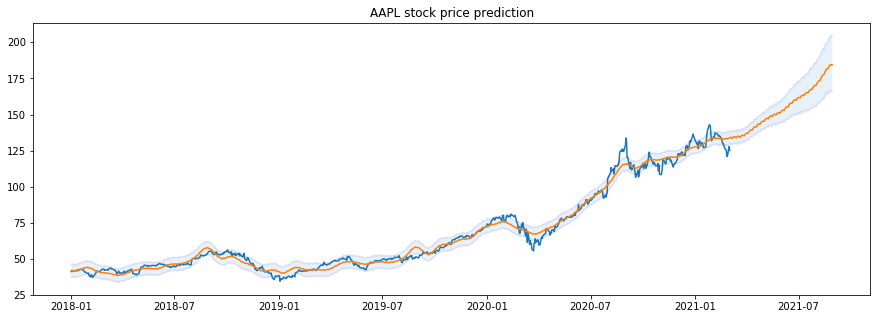

In [66]:
plt.figure(figsize=(15,5))
plt.title(symbol + ' stock price prediction')
plt.plot(df['ds'], df['Adj Close'])
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(forecast['ds'], forecast['yhat_lower'], alpha=0.1, color='blue')
plt.plot(forecast['ds'], forecast['yhat_upper'], alpha=0.1, color='blue')

plt.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'], alpha=0.1)
#plt.plot(forecast['ds'], forecast['trend'])

plt.show()

#### Sources:
- https://facebook.github.io/prophet/docs/quick_start.html   
- https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3
- https://facebook.github.io/prophet/docs/uncertainty_intervals.html
- https://medium.com/swlh/facebook-prophet-426421f7e331
- https://www.youtube.com/watch?v=95-HMzxsghY&ab_channel=ChicagoPythonUsersGroup


#### Facebook Prophet documentation
- https://facebook.github.io/prophet/docs/quick_start.html